# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [17]:
def integer_spiral_numpy(n):
    matrix = np.zeros((n+2, n+2), dtype=int)  # matice s okrajem 0
    values = np.arange(1, n**2 + 1)  

    x, y = (n+1) // 2, (n+1) // 2  # stred matice
    matrix[x, y] = values[0]  # 1 do stredu
    values = values[1::]  

    # smycka pro doplneni hodnot do matice
    for layer in range(1, (n+1)//2 + 1):
        # nahoru
        matrix[x-layer+1:x+layer, y-layer] = values[:2*layer-1][::-1]
        values = values[2*layer-1:]
        
        # doprava dole 
        matrix[x+layer, y-layer+1:y+layer+1] = values[:2*layer][::-1]
        values = values[2*layer:]
        
        # dolu
        matrix[x-layer:x+layer, y+layer] = values[:2*layer][::1]
        values = values[2*layer:]
        
        # doleva nahore
        matrix[x-layer, y-layer:y+layer] = values[:2*layer-1][::1]
        values = values[2*layer-1:]

    return matrix[1:-1, 1:-1]  # vratit matici bez okraju



In [23]:
import numpy as np

def integer_spiral_numpy(n):
    matrix = np.zeros((n+2, n+2), dtype=int)  # matice s okrajem 0
    values = np.arange(1, n**2 + 1)  

    x, y = (n+1) // 2, (n+1) // 2  # stred matice
    matrix[x, y] = values[0]  # 1 do stredu
    values = values[1:]  

    # smycka pro doplneni hodnot do matice
    for layer in range(1, (n+1)//2 + 1):
        # nahoru
        if len(values) >= 2*layer:
            matrix[x-layer, y-layer:y+layer] = values[:2*layer][::-1]
            values = values[2*layer:]
        else:
            matrix[x-layer, y-layer:y+layer][:len(values)] = values[::-1]
            values = []
        
        # doprava dole 
        if len(values) >= 2*layer:
            matrix[x-layer+1:x+layer+1, y+layer] = values[:2*layer][::-1]
            values = values[2*layer:]
        else:
            matrix[x-layer+1:x+layer+1, y+layer][:len(values)] = values[::-1]
            values = []

        # dolu
        if len(values) >= 2*layer:
            matrix[x+layer, y+layer-1:y-layer-1:-1] = values[:2*layer]
            values = values[2*layer:]
        else:
            matrix[x+layer, y+layer-1:y-layer-1:-1][:len(values)] = values
            values = []
        
        # doleva nahore
        if len(values) >= 2*layer:
            matrix[x-layer+1:x+layer+1, y-layer] = values[:2*layer]
            values = values[2*layer:]
        else:
            matrix[x-layer+1:x+layer+1, y-layer][:len(values)] = values
            values = []

    return matrix[1:-1, 1:-1]  # vratit matici bez okraju

B = integer_spiral_numpy(5)
print(B)

[[13 12 11 10  0]
 [22  3  2  0 17]
 [23  8  1  5 16]
 [24  9  6  4 15]
 [25 20 19 18 14]]


In [25]:
# TODO otestujte rychlost obou implementací
import timeit
n_values = [101, 1001, 10001]

for n in n_values:
    print(f"Výsledky pro n = {n}:")
    print("Testování integer_spiral_numpy:")
    print(timeit.timeit("integer_spiral_numpy(n)", globals=globals(), number=1))
    print("Testování původní funkce integer_spiral:")
    print(timeit.timeit("integer_spiral(n)", globals=globals(), number=1))
    print("______________________________________________________")

Výsledky pro n = 101:
Testování integer_spiral_numpy:
0.008392833000016253
Testování původní funkce integer_spiral:
0.0028815420000682934
______________________________________________________
Výsledky pro n = 1001:
Testování integer_spiral_numpy:
0.007802084000104514
Testování původní funkce integer_spiral:
0.16553808400021808
______________________________________________________
Výsledky pro n = 10001:
Testování integer_spiral_numpy:
1.0656020829997033
Testování původní funkce integer_spiral:
16.897789042000113
______________________________________________________


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
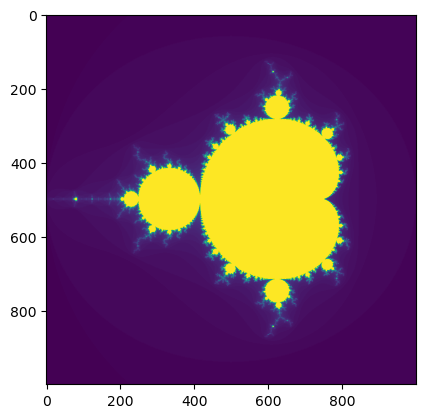

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, v kolikáté iteraci $k$ se stalo, že $|z_i| > 2$ (jakmile toto nastane jednou, už to bude platit pro všechna $n > i$)
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [ ]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):

    # vytvoreni mrizky komplecnich cisek na intervalu
    x, y = np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y 
    
    # inicializace matic pro Z 
    # pocet iteraci pro divergence
    Z = np.zeros(C.shape, dtype=complex)
    divergence_matrix = np.zeros(C.shape, dtype=int)

    # interace pro kazde komplexni cislo v mrizce
    for i in range(k):
        mask = np.abs(Z) <= 2
        divergence_matrix += mask  
        Z[mask] = Z[mask]**2 + C[mask]  # iterace z = z^2 + c
    
    
    return divergence_matrix


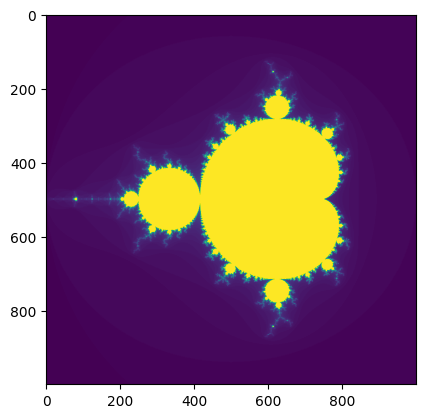

In [6]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral).